<a href="https://colab.research.google.com/github/ddoneu/ECON3916-Statistical-Machine-Learning/blob/main/Assignment%201/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1.1: Construct the "Student Basket"**

In [140]:
# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Egg', 'Price_2016': 1.50, 'Price_2024': 3.99}
]

# **Step 1.2: Compute Inflation (Loops & Functions)**

In [141]:
# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Egg: 166.00% Inflation


# **Step 2.1: The "Data Proxy" Strategy**

In [142]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key='0d5346e9e92063e7c20dbf4b175c4bd2')

# Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
chipotle = fred.get_series('CUSR0000SEFV') # Food Away from Home
egg = fred.get_series('APU0000708111') # Average Price: Eggs, Grade A, Large (Cost per Dozen) in U.S. City Average
#

# **Step 2.2: Normalization Logic**

In [143]:
import pandas as pd

In [144]:
#Turn data into Data frame
df = pd.DataFrame({
    "CPI" : official_cpi,
    "Tuition" : tuition,
    "Rent" : rent,
    "Chipotle" : chipotle,
    "Egg" : egg
})

In [145]:
#Set start date to 01/01/2016 so all start at the same date
df = df['2016-01-01': '2024-12-31']

I saw some data missing in 2025 drawing the graph so i came back to limit the date to 2024 only

In [146]:
#Get start date value:
start_date_values = df.iloc[0]

#Normalization formula as provided:
#Value_Index = (Value_Current / Value_at_Start_Date) * 100
df_normalized = (df_start_end / start_date_values) * 100

df_normalized


,CPI,Tuition,Rent,Chipotle,Egg
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.138869,97.379725
2016-03-01,100.180095,100.470288,100.607131,100.355827,89.390034
2016-04-01,100.563850,100.692146,100.924580,100.599712,77.018900
2016-05-01,100.801592,100.929861,101.258485,100.813978,72.336770
...,...,...,...,...,...
2024-08-01,132.181088,123.818388,144.904697,142.464552,137.628866
2024-09-01,132.484052,124.539534,145.329105,142.947707,164.132302
2024-10-01,132.784071,124.849106,145.769626,143.286993,144.759450
2024-11-01,133.156464,125.191108,146.131299,143.688596,156.743986


# **Step 3.1: Visualizing Raw Components**


In [147]:
import matplotlib.pyplot as plt

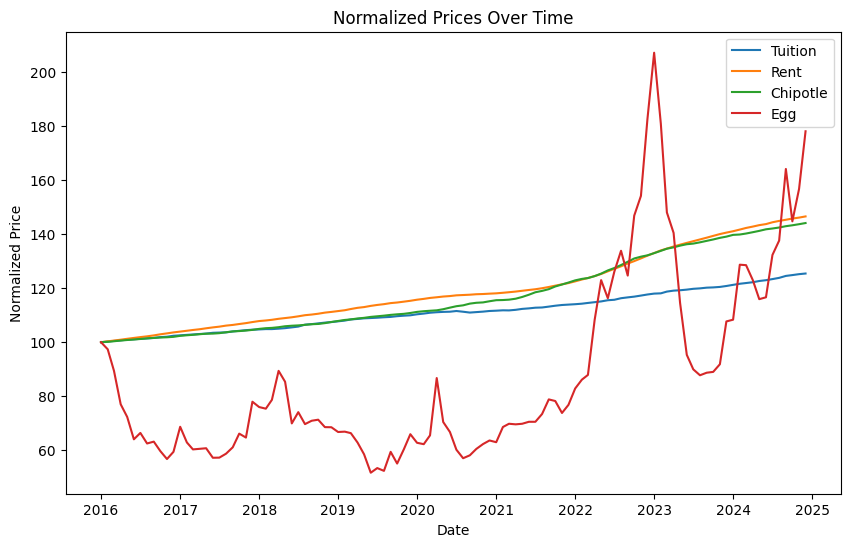

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(df_normalized.index, df_normalized['Tuition'], label='Tuition')
plt.plot(df_normalized.index, df_normalized['Rent'], label='Rent')
plt.plot(df_normalized.index, df_normalized['Chipotle'], label='Chipotle')
plt.plot(df_normalized.index, df_normalized['Egg'], label='Egg')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Normalized Prices Over Time')
plt.legend()


# Step 3.2: The Weighted "Student SPI" (Honest Chart)

In [149]:
weight = {
    'Tuition' : 0.4,
    'Rent' : 0.3,
    'Chipotle' : 0.2,
    'Egg' : 0.1
}

In [150]:
df_normalized['Student_SPI'] = (
    df_normalized['Tuition'] * weight['Tuition'] +
    df_normalized ['Rent'] * weight['Rent'] +
    df_normalized ['Chipotle'] * weight['Chipotle'] +
    df_normalized ['Egg'] * weight ['Egg']
    )


In [151]:
df_normalized['Student_SPI']

,Student_SPI
2016-01-01,100.000000
2016-02-01,99.956684
2016-03-01,99.380423
2016-04-01,98.376065
2016-05-01,98.145962
...,...
2024-08-01,135.254561
2024-09-01,138.417317
2024-10-01,136.803874
2024-11-01,138.327951


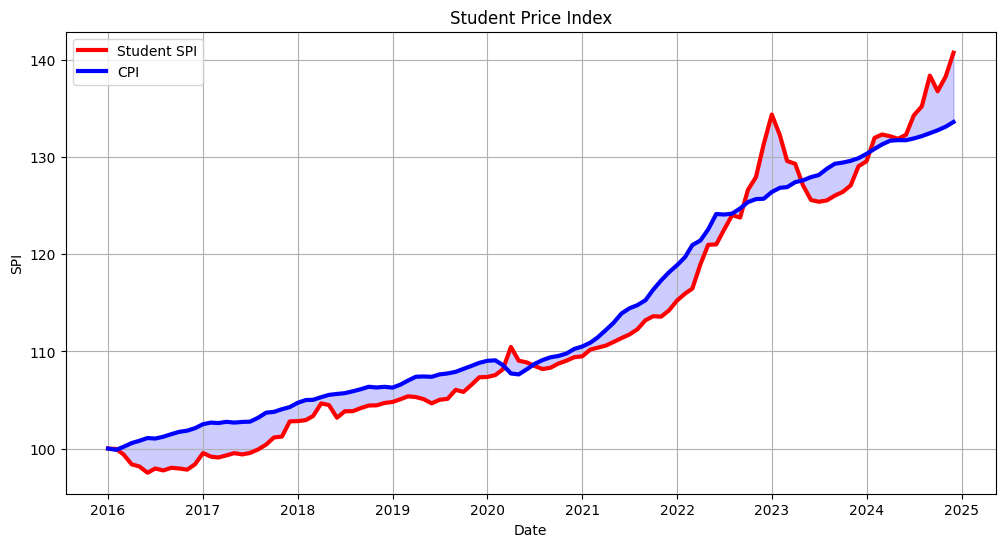

In [152]:
plt.figure(figsize=(12, 6))

plt.plot(df_normalized.index, df_normalized['Student_SPI'], label='Student SPI', color ='red', linewidth = 3)
plt.plot(df_normalized.index, df_normalized['CPI'], label='CPI', color ='blue', linewidth = 3)

plt.fill_between(df_normalized.index, df_normalized['Student_SPI'], df_normalized['CPI'], color='blue', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('SPI')
plt.title('Student Price Index')
plt.legend()
plt.grid(True)
plt.show()

# **3.3: The Scale Fallacy**

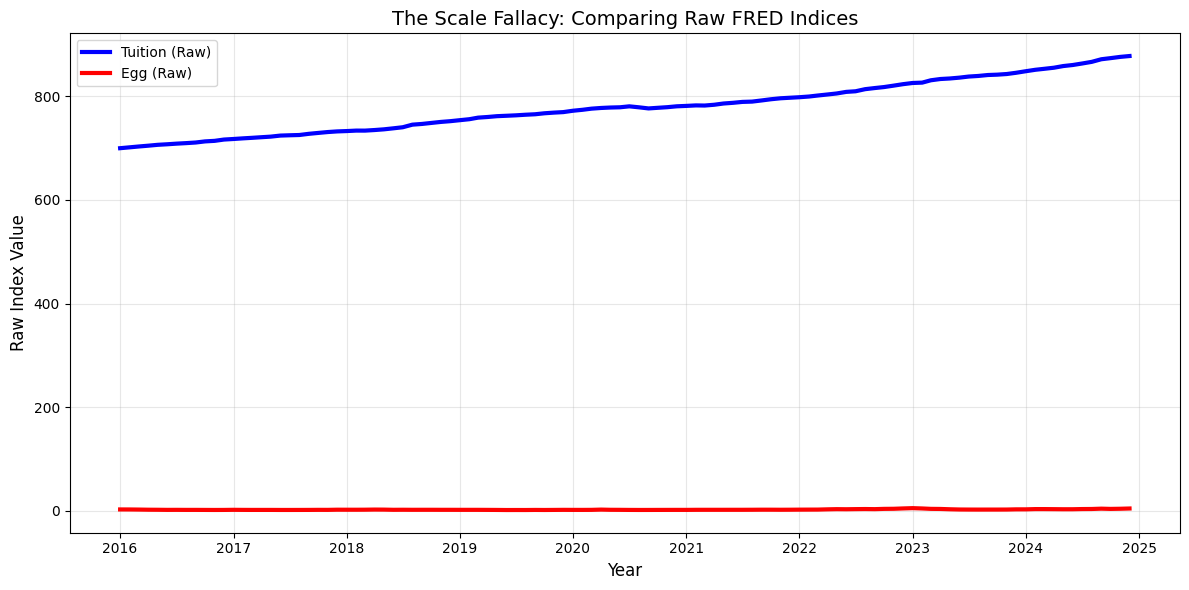

OBSERVATION:
Raw Tuition Index: 700.00 → 877.99
Raw Eggs Index: 2.33 → 4.15
This comparison is MEANINGLESS because they have different base years!


In [153]:
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Tuition'], label='Tuition (Raw)', linewidth= 3, color='blue')
plt.plot(df.index, df['Egg'], label='Egg (Raw)', linewidth= 3, color='red')

plt.title('The Scale Fallacy: Comparing Raw FRED Indices',
          fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Raw Index Value', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("OBSERVATION:")
print(f"Raw Tuition Index: {df['Tuition'].iloc[0]:.2f} → {df['Tuition'].iloc[-1]:.2f}")
print(f"Raw Eggs Index: {df['Egg'].iloc[0]:.2f} → {df['Egg'].iloc[-1]:.2f}")
print("This comparison is MEANINGLESS because they have different base years!")


The HW wanted to explain why comparing raw indices with different base years. However, since I already limit my data time frame to 2016-2024 in the step above, I will have to fetch the full data again to show the bad chart:

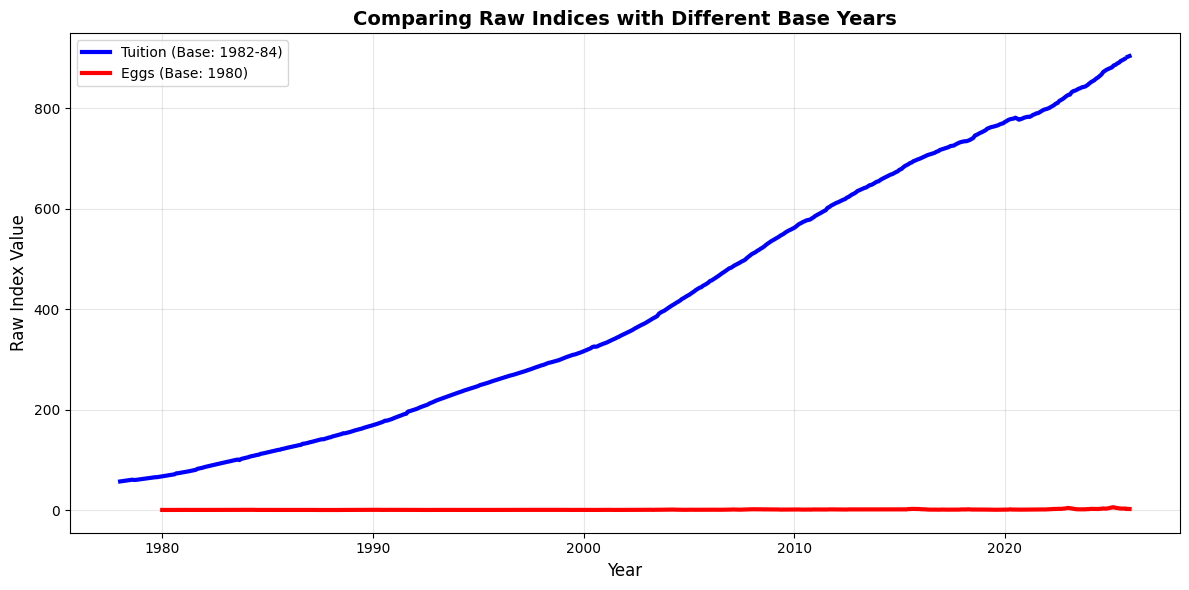

These scales are INCOMPARABLE due to different base years!


In [154]:
tuition_full = fred.get_series('CUSR0000SEEB')
eggs_full = fred.get_series('APU0000708111')

df_full = pd.DataFrame({
    'Tuition': tuition_full,
    'Eggs': eggs_full
})

plt.figure(figsize=(12, 6))

plt.plot(df_full.index, df_full['Tuition'], label='Tuition (Base: 1982-84)', linewidth=3, color='blue')
plt.plot(df_full.index, df_full['Eggs'], label='Eggs (Base: 1980)', linewidth=3, color='red')

plt.title('Comparing Raw Indices with Different Base Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Raw Index Value', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("These scales are INCOMPARABLE due to different base years!")

Now a good graph:

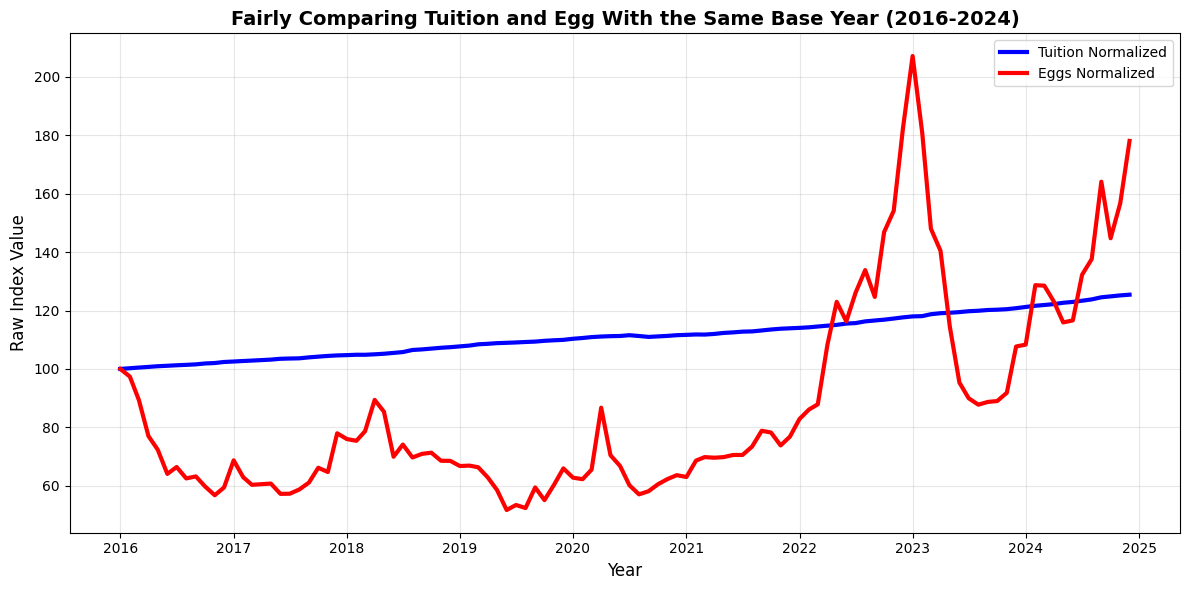

In [155]:
plt.figure(figsize=(12, 6))

plt.plot(df_normalized.index, df_normalized['Tuition'], label='Tuition Normalized', linewidth=3, color='blue')
plt.plot(df_normalized.index, df_normalized['Egg'], label='Eggs Normalized', linewidth=3, color='red')

plt.title('Fairly Comparing Tuition and Egg With the Same Base Year (2016-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Raw Index Value', fontsize=12)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [156]:
print(f"Tuition: 100.0 → {df_normalized['Tuition'].iloc[-1]:.1f} (+{df_normalized['Tuition'].iloc[-1]-100:.1f}%)")
print(f"Eggs: 100.0 → {df_normalized['Egg'].iloc[-1]:.1f} (+{df_normalized['Egg'].iloc[-1]-100:.1f}%)")
print(f"Eggs inflated {(df_normalized['Egg'].iloc[-1]-100)/(df_normalized['Tuition'].iloc[-1]-100):.1f}x faster!")
print("=" * 70)

Tuition: 100.0 → 125.4 (+25.4%)
Eggs: 100.0 → 178.1 (+78.1%)
Eggs inflated 3.1x faster!


# **AI TAKEOVER Task 4.1: The Ultimate Reality Check (Boston vs. USA vs. You)**

In [158]:
# Fetch Boston-Cambridge-Newton CPI
boston_cpi = fred.get_series('CUURA103SA0', observation_start='2016-01-01', observation_end='2024-12-31')

# Add to your existing dataframe
df['Boston_CPI'] = boston_cpi

# Check for missing values
print("Missing values check:")
print(df[['CPI', 'Boston_CPI']].isnull().sum())

# Forward fill any missing values (Boston data might be bimonthly)
df['Boston_CPI'] = df['Boston_CPI'].fillna(method='ffill')

Missing values check:
CPI            0
Boston_CPI    54
dtype: int64


/tmp/ipython-input-1801575358.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Boston_CPI'] = df['Boston_CPI'].fillna(method='ffill')


In [159]:
# Get the first value for Boston CPI (January 2016)
boston_start = df['Boston_CPI'].iloc[0]

# Normalize Boston CPI
df_normalized['Boston_CPI'] = (df['Boston_CPI'] / boston_start) * 100

print("\nNormalized Boston CPI (First 3 values - should start at 100):")
print(df_normalized[['CPI', 'Boston_CPI', 'Student_SPI']].head(3))


Normalized Boston CPI (First 3 values - should start at 100):
                   CPI  Boston_CPI  Student_SPI
2016-01-01  100.000000  100.000000   100.000000
2016-02-01   99.867032  100.000000    99.956684
2016-03-01  100.180095  100.533406    99.380423


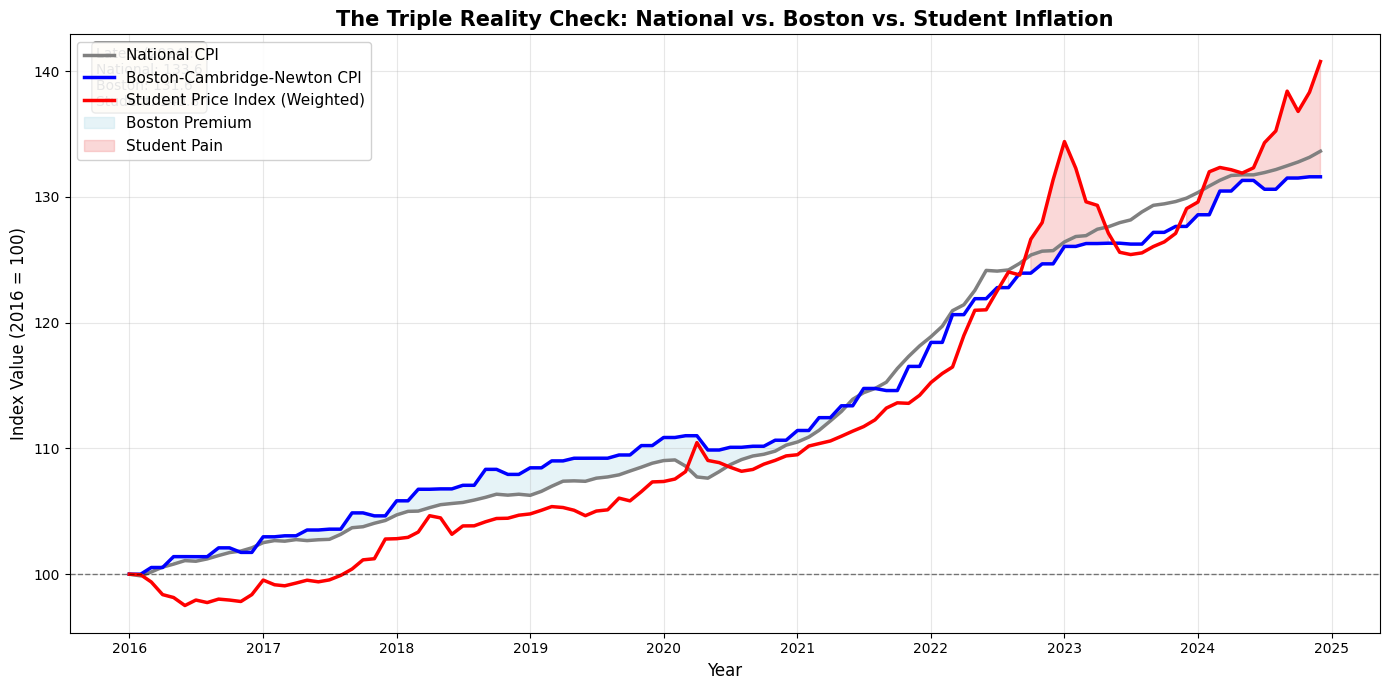

In [160]:
# Create the comparison chart
plt.figure(figsize=(14, 7))

# Plot three lines
plt.plot(df_normalized.index, df_normalized['CPI'],
         label='National CPI', linewidth=2.5, color='grey', linestyle='-')
plt.plot(df_normalized.index, df_normalized['Boston_CPI'],
         label='Boston-Cambridge-Newton CPI', linewidth=2.5, color='blue', linestyle='-')
plt.plot(df_normalized.index, df_normalized['Student_SPI'],
         label='Student Price Index (Weighted)', linewidth=2.5, color='red', linestyle='-')

# Add shading to highlight divergence
plt.fill_between(df_normalized.index,
                 df_normalized['Boston_CPI'],
                 df_normalized['CPI'],
                 where=(df_normalized['Boston_CPI'] >= df_normalized['CPI']),
                 color='lightblue', alpha=0.3, label='Boston Premium')

plt.fill_between(df_normalized.index,
                 df_normalized['Student_SPI'],
                 df_normalized['Boston_CPI'],
                 where=(df_normalized['Student_SPI'] >= df_normalized['Boston_CPI']),
                 color='lightcoral', alpha=0.3, label='Student Pain')

# Formatting
plt.title('The Triple Reality Check: National vs. Boston vs. Student Inflation',
          fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index Value (2016 = 100)', fontsize=12)
plt.legend(loc='upper left', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.axhline(y=100, color='black', linestyle='--', alpha=0.5, linewidth=1)

# Add annotation for latest values
latest_national = df_normalized['CPI'].iloc[-1]
latest_boston = df_normalized['Boston_CPI'].iloc[-1]
latest_student = df_normalized['Student_SPI'].iloc[-1]

plt.text(0.02, 0.98,
         f'Latest (2024):\n'
         f'National: {latest_national:.1f}\n'
         f'Boston: {latest_boston:.1f}\n'
         f'Student: {latest_student:.1f}',
         transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()